## Task 6.2

## Exploring Relationships

In [52]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the visualization settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# Load the dataset
citibike_df = pd.read_csv('data\citibike_clean.csv')
# Display the first few rows of the dataset
citibike_df.head()

,trip_id,bike_id,start_station_id,Ride_duration_hrs,start_time,end_time,start_hour,end_hour,start_week,end_week,...,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,subscriber,age,age_group,gender,gender_label,weekday
0,LnQzQk,16013.0,523.0,0.275833,2013-09-09 18:18:55,2013-09-09 18:35:28,18.0,18.0,37.0,37.0,...,-73.991382,W 20 St & 7 Ave,40.742388,-73.997262,Subscriber,45.0,40-50,2.0,Female,Mon
1,IL9boN,15230.0,257.0,0.161389,2013-09-12 18:38:53,2013-09-12 18:48:34,18.0,18.0,37.0,37.0,...,-74.002472,St Marks Pl & 2 Ave,40.728419,-73.987140,Subscriber,30.0,30-40,1.0,Male,Thu
2,46clGB,17942.0,479.0,0.100278,2013-09-18 19:44:04,2013-09-18 19:50:05,19.0,19.0,38.0,38.0,...,-73.991255,W 56 St & 10 Ave,40.768254,-73.988639,Subscriber,24.0,18-30,1.0,Male,Wed
3,v7vdFt,19683.0,527.0,0.155833,2013-09-28 11:54:37,2013-09-28 12:03:58,11.0,12.0,39.0,39.0,...,-73.974347,E 52 St & 2 Ave,40.756014,-73.967416,Subscriber,25.0,18-30,2.0,Female,Sat
4,HbKJBz,14581.0,293.0,0.118611,2013-09-27 22:01:01,2013-09-27 22:08:08,22.0,22.0,39.0,39.0,...,-73.990765,E 7 St & Avenue A,40.726218,-73.983799,Subscriber,27.0,18-30,2.0,Female,Fri


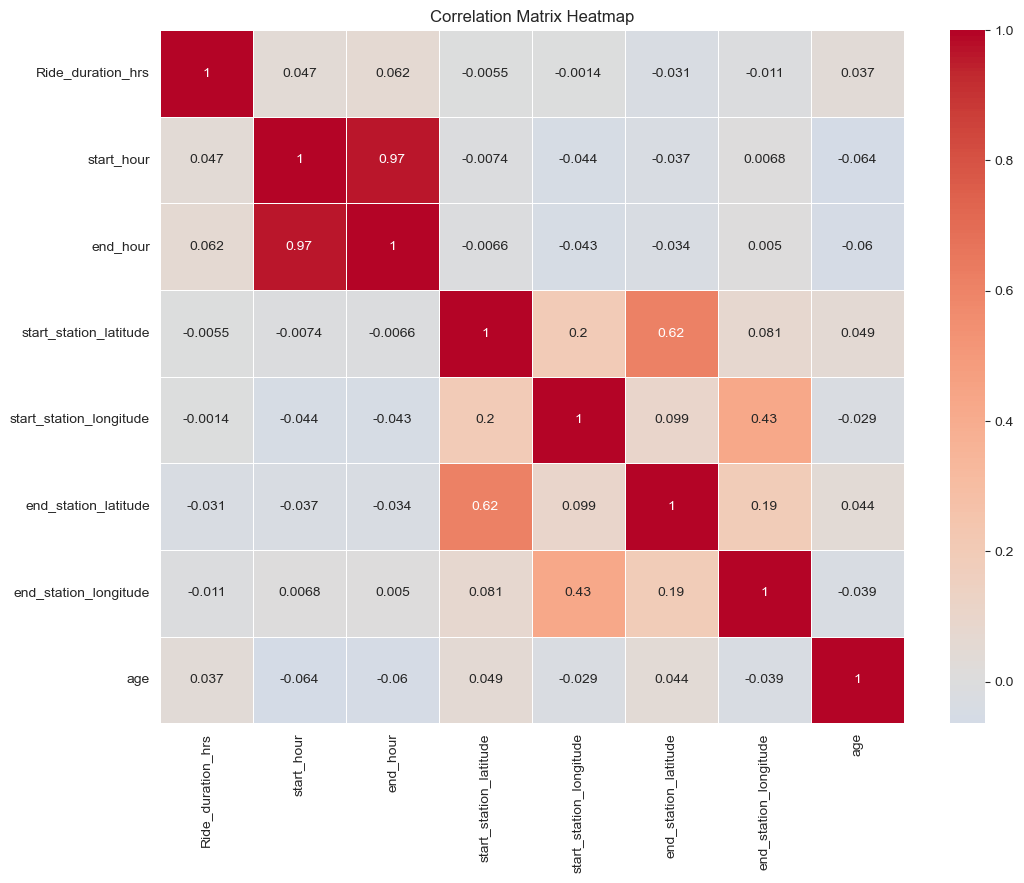

In [33]:
# Selecting relevant columns for correlation
correlation_cols = [
    'Ride_duration_hrs', 'start_hour', 'end_hour', 
    'start_station_latitude', 'start_station_longitude', 
    'end_station_latitude', 'end_station_longitude', 
    'age']

# Compute the correlation matrix
correlation_matrix = citibike_df[correlation_cols].corr()

# Plotting the heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

The heatmap visualizes the correlation coefficients between pairs of numeric variables in the dataset. Explanation of the correlation coefficient values and their implications:

***Close to +1: A strong positive relationship. An increase in one variable is associated with a proportional increase in the other.

***Close to -1: A strong negative relationship. An increase in one variable is associated with a proportional decrease in the other.

***Close to 0: Little to no relationship.

### Heatmap Insights:

The heatmap visually portrays correlations between selected variables in the city bike dataset. Predominantly, the correlations are relatively low, implying that these variables don't significantly linearly predict one another. An exception is the high correlation between "start_hour and end_hour", which is anticipated since rides starting at a specific hour are likely to conclude around that same timeframe, especially if they're brief. Another observation is the correlation between the start and end coordinates. Rides that commence and conclude nearby will possess analogous coordinates. Furthermore, there's a subtle negative correlation between age and Ride_duration_hrs, suggesting rides might be marginally shorter as the age of riders increase.

Delving deeper, the data indicates a minor negative correlation between "start_hour and age". This could imply that younger riders might initiate their rides later in the day compared to their older counterparts. Additionally, age exhibits a mild negative correlation with gender, hinting that the dataset may contain slightly younger females than males. However, it's paramount to remember that correlation doesn't signify causation. While two factors might correlate, it doesn't denote that one influences the other. Moreover, a meager correlation doesn't negate a relationship; the association might just be non-linear and not captured by the correlation coefficient.

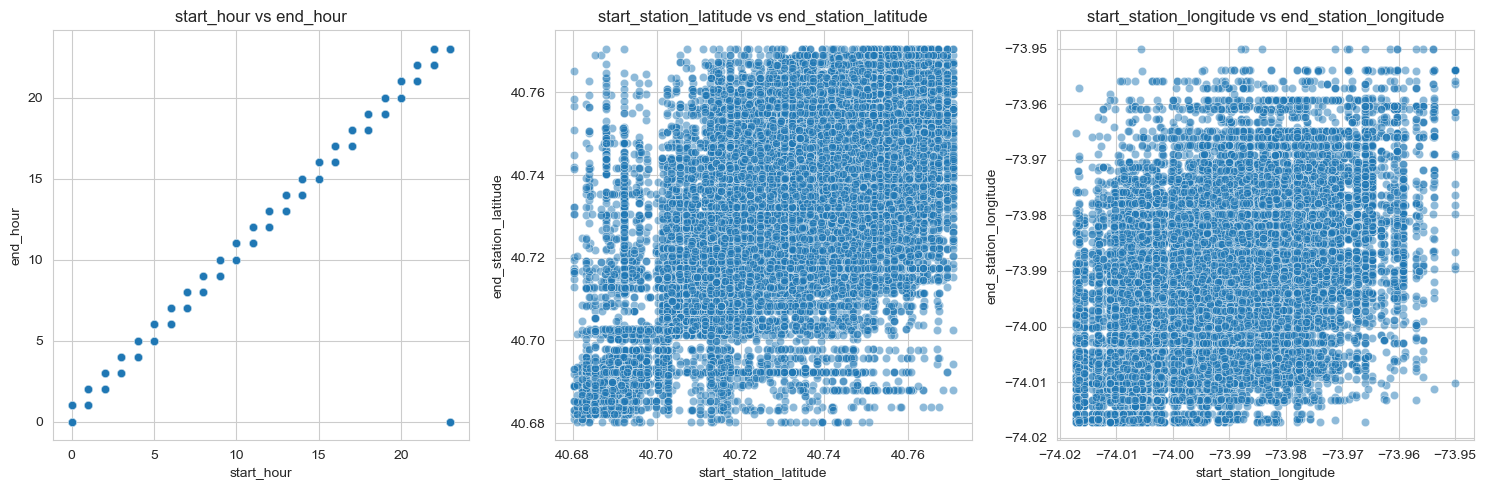

In [37]:
# Based on the heatmap, the variables with the strongest correlations are:
# 1. start_hour and end_hour
# 2. start_station_latitude and end_station_latitude
# 3. start_station_longitude and end_station_longitude

plt.figure(figsize=(15, 5))

# Scatterplot for start_hour vs end_hour
plt.subplot(1, 3, 1)
sns.scatterplot(x='start_hour', y='end_hour', data=citibike_df, alpha=0.5)
plt.title('start_hour vs end_hour')

# Scatterplot for start_station_latitude vs end_station_latitude
plt.subplot(1, 3, 2)
sns.scatterplot(x='start_station_latitude', y='end_station_latitude', 
                data=citibike_df, alpha=0.5)
plt.title('start_station_latitude vs end_station_latitude')

# Scatterplot for start_station_longitude vs end_station_longitude
plt.subplot(1, 3, 3)
sns.scatterplot(x='start_station_longitude', y='end_station_longitude', 
                data=citibike_df, alpha=0.5)
plt.title('start_station_longitude vs end_station_longitude')

plt.tight_layout()
plt.show()


### Scatterplot Insights

The scatterplot for "start_hour versus end_hour" shows a discernible positive linear relationship. As the ride's initiation hour increases, the termination hour tends to follow suit. This observed trend is intuitive since short rides, in all likelihood, will conclude in close proximity to their commencement hour. The pronounced concentration along the diagonal line further underscores this, signifying that a sizable portion of the rides both starts and ends within the same hour.

On the other hand, the plots indicate relationships between start and end station coordinates, both latitudinal and longitudinal, provide a more nuanced picture. While there is a positive trend, indicating that numerous rides both start and end near each other, the plots are characterized by a higher degree of dispersion. This suggests that while many rides are localized, a significant number travel greater distances, moving across diverse parts of the city. The longitudinal plot, in particular, demonstrates a broader variability, hinting at a more extensive east-west movement among riders.

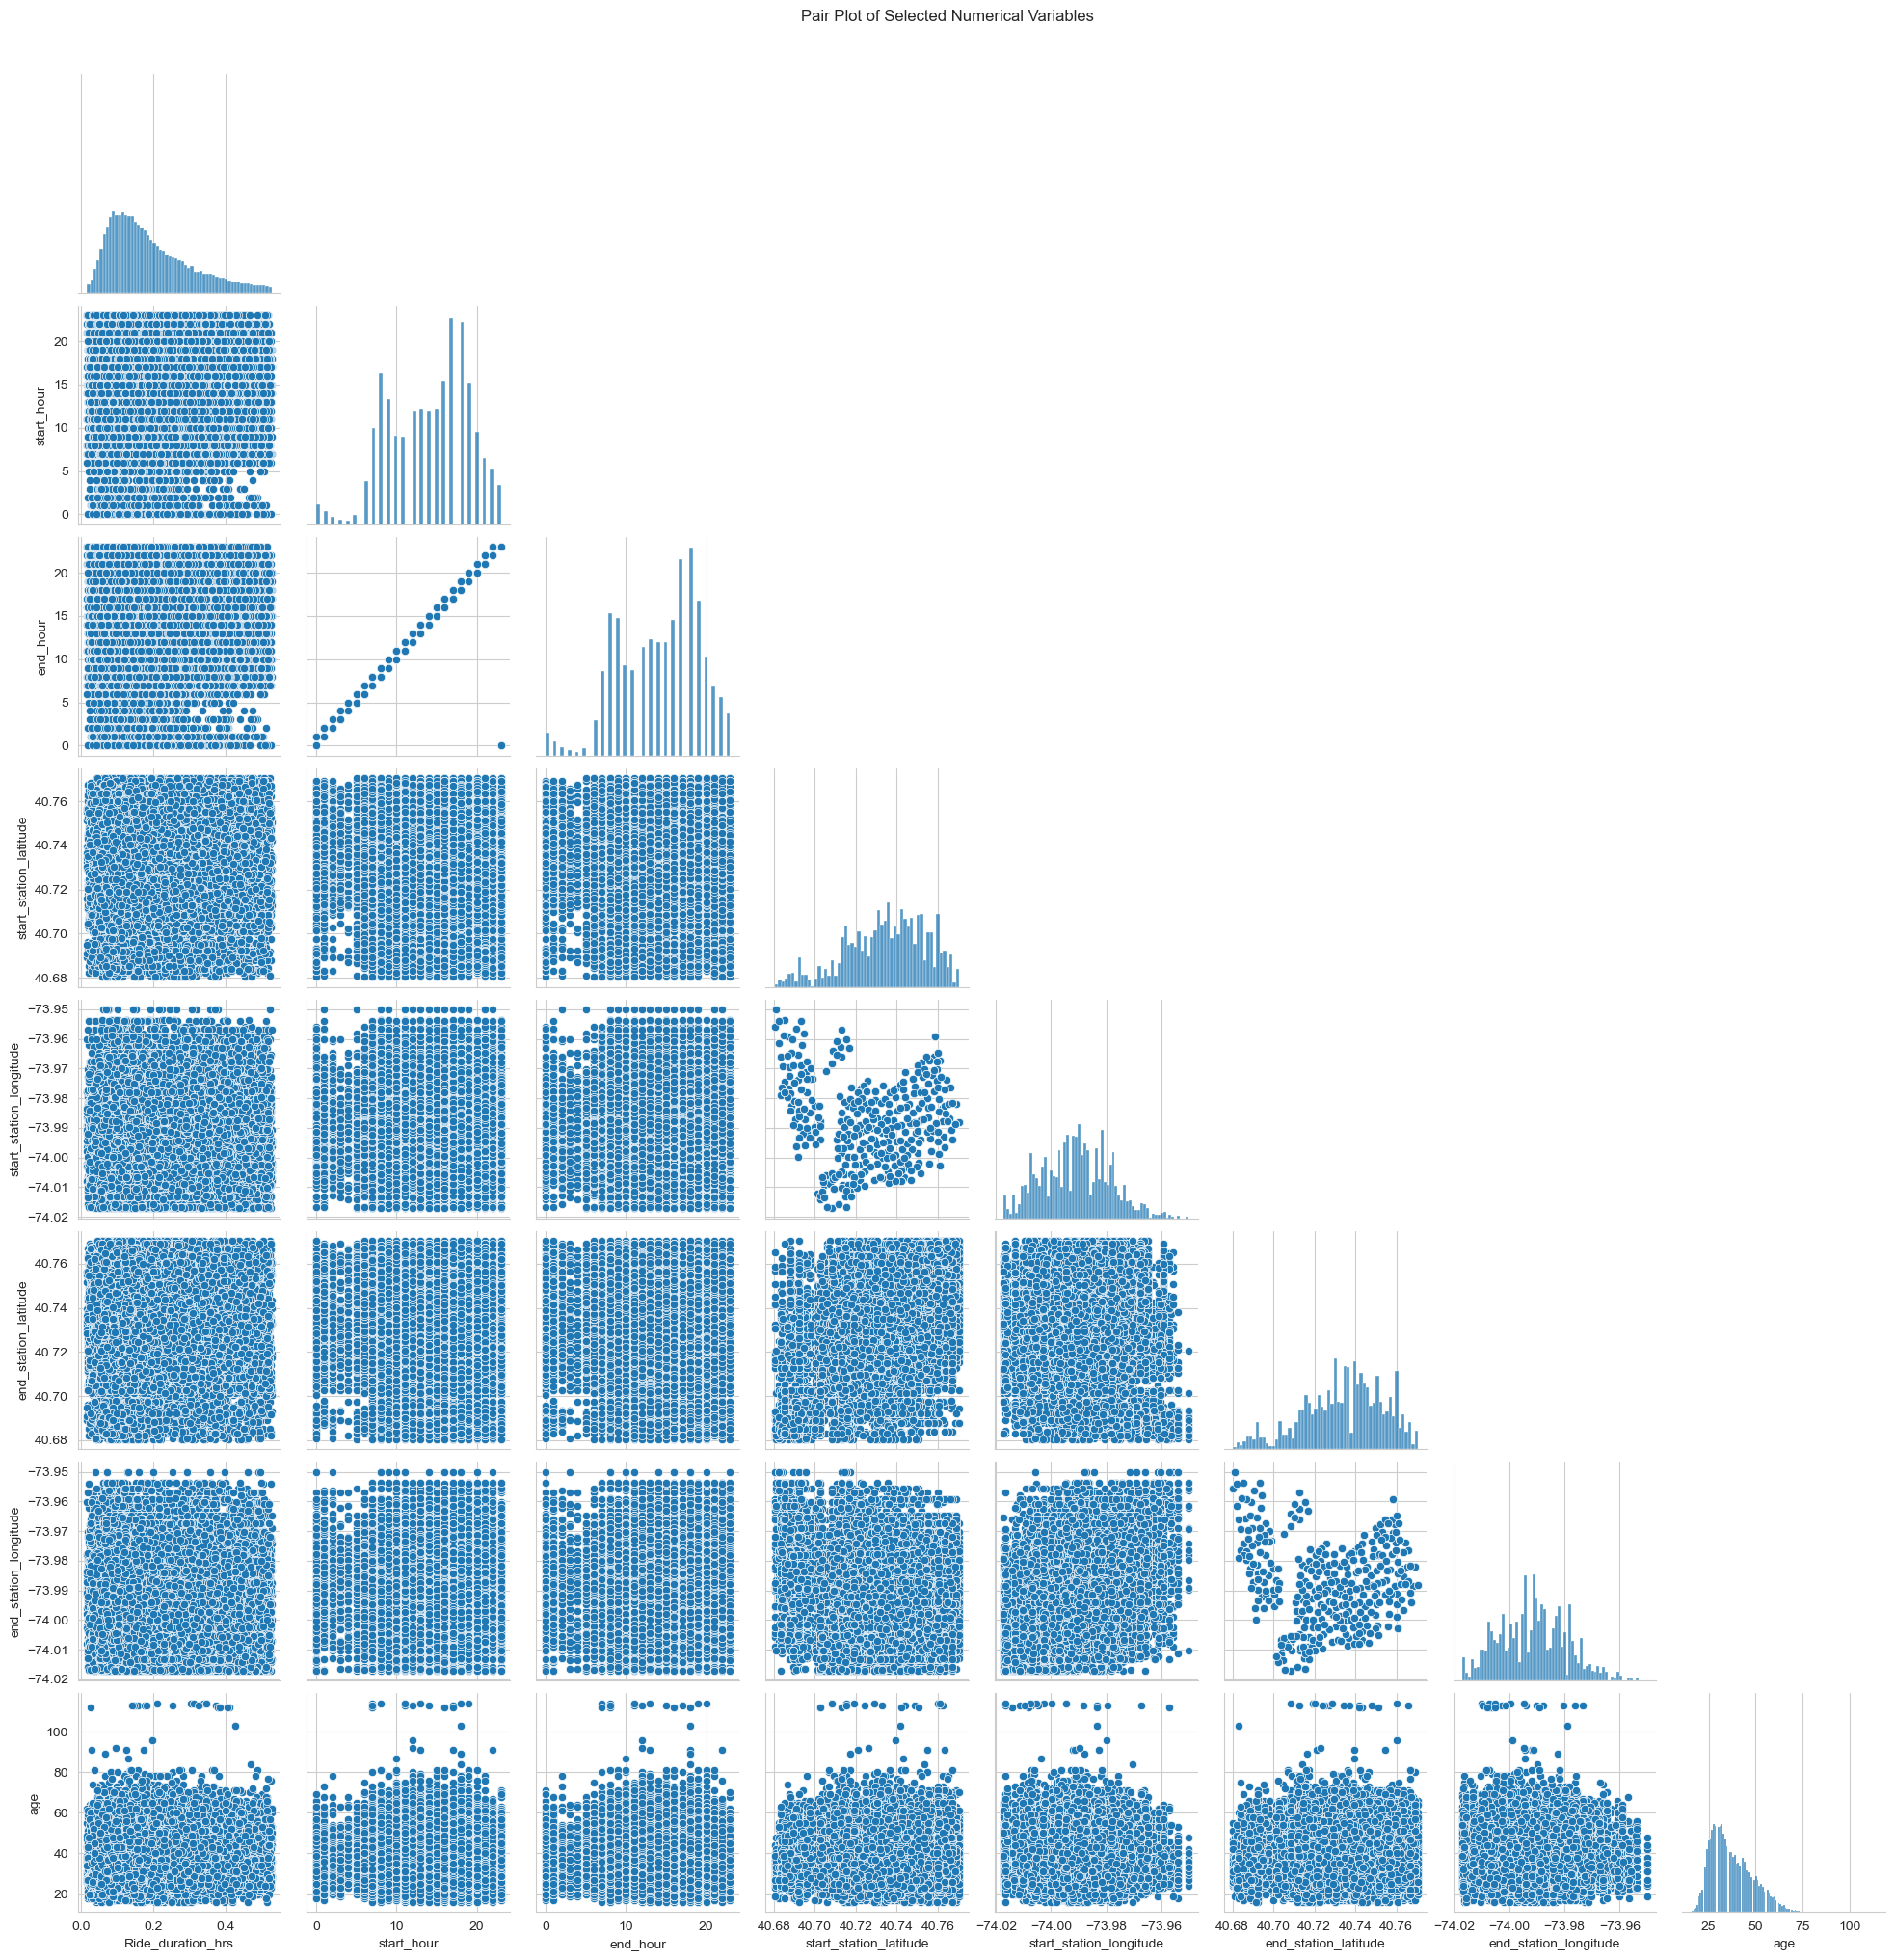

In [39]:
# Create a pair plot for the relevant numerical columns
sns.pairplot(citibike_df[correlation_cols], corner=True)
plt.suptitle("Pair Plot of Selected Numerical Variables", y=1.02)
plt.show()

### Pair Plot Insights 

The pair plot offers an insightful snapshot of relationships and distributions among selected numerical variables. On the diagonal, the distributions of individual variables are evident. Most notably, the "Ride_duration_hrs" variable showcases a right-skewed distribution, suggesting that the majority of rides are short, with only a few extending over longer durations. The bimodal distributions observed in "start_hour and end_hour" hint at two predominant times in the day when rides are initiated and concluded, possibly following a typical morning and evening commuting routine. Similarly, the distributions of station latitude and longitude coordinates indicate certain popular zones within the city, while the age distribution is leaning towards younger riders, perhaps indicating a preference or promotional targeting. Additionally, younger individuals may be more tech-savvy, being raised with smart phones may be one cause for the higher concentration of younger riders. 

Among the scatter plots, the pronounced linear relationship between "start_hour and end_hour" reaffirms the idea that most rides are relatively short, concluding soon after they start. The scatter plots for station coordinates, both latitudinal and longitudinal, portray a broad yet positive correlation, signifying that many rides tend to start and end in proximity. However, the dispersion indicates considerable variability, hinting at diverse ride patterns across the city. Given these observations, it would be compelling to delve deeper into variables like "Ride_duration_hrs" to uncover the nuances of longer rides, and "start_hour and end_hour" to pinpoint exact peak times, providing a clearer picture of city bike usage patterns.

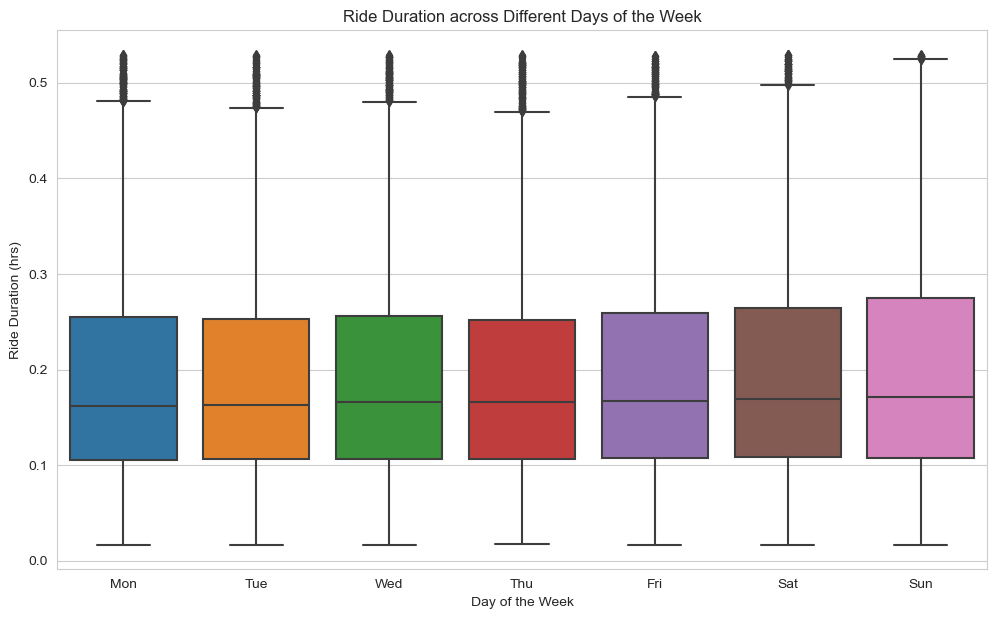

In [41]:
# Creating a box plot for Ride_duration_hrs across different weekdays
plt.figure(figsize=(12, 7))
sns.boxplot(x='weekday', y='Ride_duration_hrs', data=citibike_df, order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title("Ride Duration across Different Days of the Week")
plt.ylabel("Ride Duration (hrs)")
plt.xlabel("Day of the Week")
plt.show()

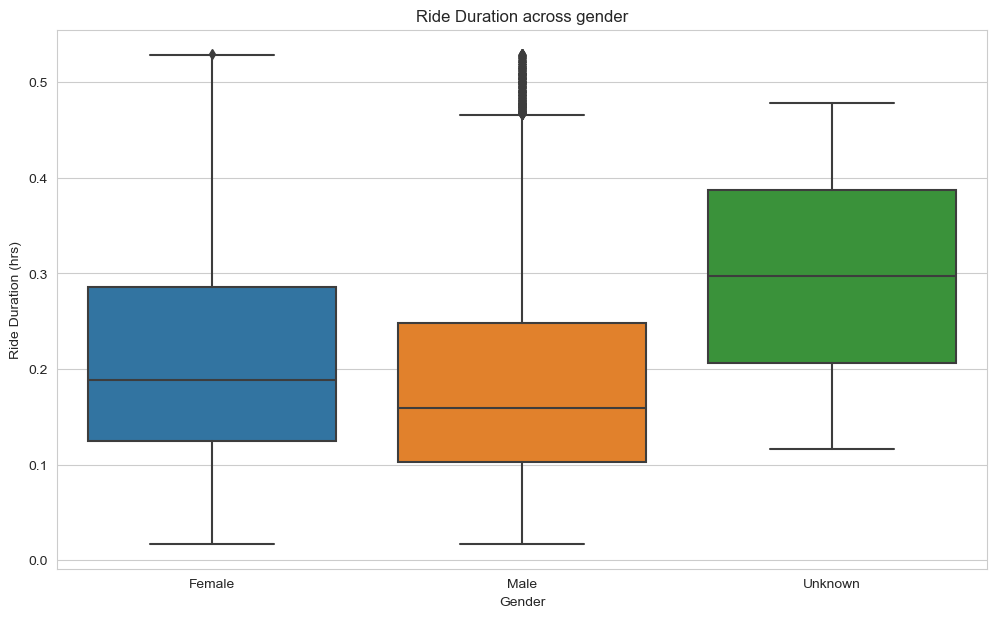

In [51]:
# Creating a box plot for Ride_duration_hrs across different gender
plt.figure(figsize=(12, 7))
sns.boxplot(x='gender_label', y='Ride_duration_hrs', data=citibike_df)
plt.title("Ride Duration across gender")
plt.ylabel("Ride Duration (hrs)")
plt.xlabel("Gender")
plt.show()

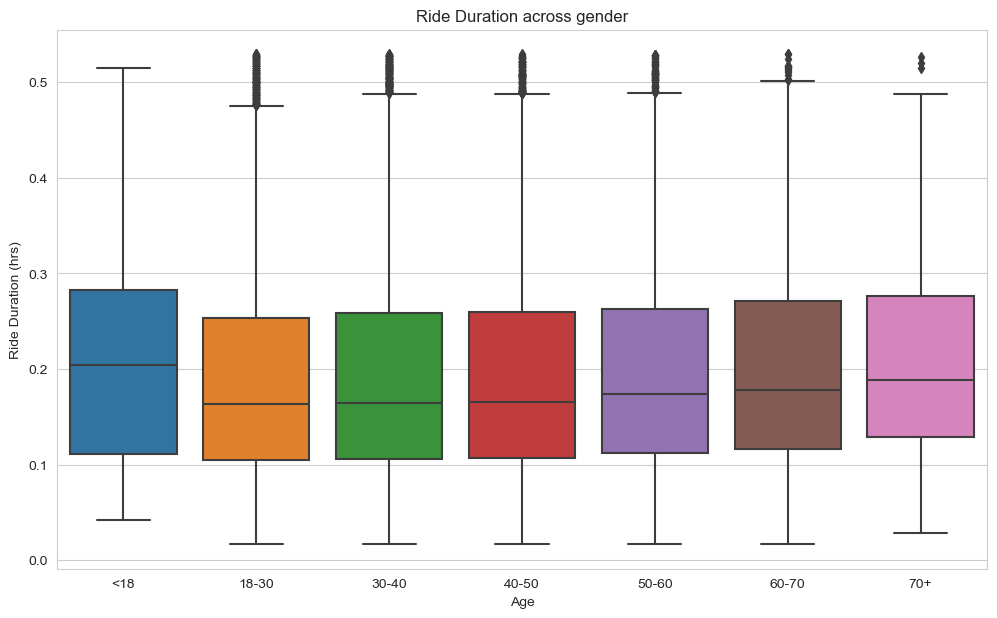

In [54]:
# Creating a box plot for Ride_duration_hrs across different age
plt.figure(figsize=(12, 7))
sns.boxplot(x='age_group', y='Ride_duration_hrs', 
            order=['<18', '18-30', '30-40', '40-50', '50-60', '60-70', '70+'],
            data=citibike_df)
plt.title("Ride Duration across gender")
plt.ylabel("Ride Duration (hrs)")
plt.xlabel("Age")
plt.show()

### Defining Hypotheses Thus Far

Based on the visualizations and analysis so far, we can formulate the following hypotheses:

**Demand Patterns: Peak hours in start_hour are likely associated with typical commuting times.
Hypothesis: There will be a significant increase in bike usage during morning and evening commuting hours on weekdays.

**Trip Duration: The longer duration outliers might be associated with specific user behaviors or data recording issues.
Hypothesis: The extremely long trip durations are due to users not docking their bikes properly or forgetting to dock them, rather than actual prolonged usage.

**Weekday vs. Weekend Usage: The difference in trip duration distribution between weekdays and weekends suggests different usage behaviors.
Hypothesis: Bikes are used more for leisure or recreational activities during weekends compared to weekdays.

These hypotheses can be tested and validated in subsequent parts of the analysis.